In [68]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [132]:
model = tf.keras.applications.VGG19(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
model.layers

[<InputLayer name=input_layer_2, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <Conv2D name=block3_conv4, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <Conv2D name=block4_conv4, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <Conv2D name=block5_conv4, built=True>,
 <MaxPooling2D name=block5_pool, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=fc1, built=True>,


In [8]:
# def content_loss(a_c , a_g):
#     cost = 1/2*(tf.square(a_c-a_g))
#     return cost

In [12]:
# def style_loss(a_s,a_g):
#     G_s = np.zeros((a_s.shape[1],a_g.shape[1],3)) 

In [180]:
from tensorflow.keras.utils import load_img
img = load_img('test.png',target_size = (224,224))

In [181]:
img = tf.expand_dims(img,axis = 0)
img = tf.constant(img)
img = tf.keras.applications.vgg19.preprocess_input(img)
img

<tf.Tensor: shape=(1, 224, 224, 3), dtype=uint8, numpy=
array([[[[152, 139, 132],
         [152, 139, 132],
         [152, 139, 132],
         ...,
         [158, 145, 138],
         [152, 139, 132],
         [152, 139, 132]],

        [[152, 139, 132],
         [152, 139, 132],
         [152, 139, 132],
         ...,
         [152, 139, 132],
         [152, 139, 132],
         [152, 139, 132]],

        [[152, 139, 132],
         [152, 139, 132],
         [152, 139, 132],
         ...,
         [152, 139, 132],
         [152, 139, 132],
         [152, 139, 132]],

        ...,

        [[152, 139, 132],
         [152, 139, 132],
         [152, 139, 132],
         ...,
         [152, 139, 132],
         [152, 139, 132],
         [152, 139, 132]],

        [[152, 139, 132],
         [152, 139, 132],
         [152, 139, 132],
         ...,
         [152, 139, 132],
         [152, 139, 132],
         [152, 139, 132]],

        [[152, 139, 132],
         [152, 139, 132],
         [152, 139

In [52]:
np.argmax(tf.keras.layers.Activation('softmax')(model(img)))

526

In [56]:
from tensorflow.keras.applications.vgg19 import decode_predictions, VGG19, preprocess_input
import numpy as np

preds = model.predict(img)  
decoded = decode_predictions(preds, top=5)[0] 
for _, class_name, score in decoded:
    print(class_name, score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
desk 0.42644024
binder 0.092776746
scale 0.043541472
balance_beam 0.03041332
parallel_bars 0.023885362


In [152]:
submodel = tf.keras.Model(inputs=model.input , outputs = model.get_layer("block2_conv2").output)
submodeldeep = tf.keras.Model(inputs=model.input , outputs = model.get_layer("block4_conv3").output)

In [153]:
pred = submodel(img)
pred_np = pred[0].numpy()
actmax = np.max(pred[0])
maxi, maxy, maxj = np.unravel_index(np.argmax(pred_np), pred_np.shape)
print(maxi,maxy,maxj)
# plt.imshow(pred.numpy()[0,i,y,j])
# submodel(img)

99 49 45


In [154]:
predDeep = submodeldeep(img)
pred_np_deep = predDeep[0].numpy()
actmax = np.max(predDeep[0])
maxi_deep, maxy_deep, maxj_deep = np.unravel_index(np.argmax(pred_np_deep), pred_np_deep.shape)
print(maxi_deep,maxy_deep,maxj_deep,pred_np_deep.shape)
# plt.imshow(pred.numpy()[0,i,y,j])
# submodel(img)

10 14 46 (28, 28, 512)


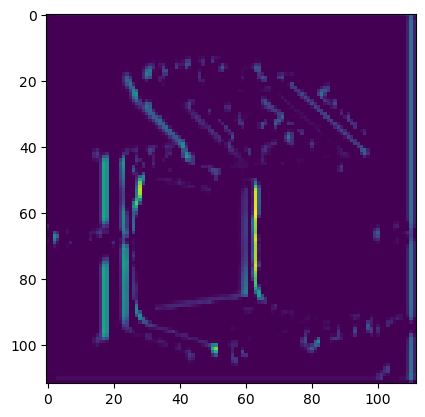

In [155]:
plt.imshow(pred.numpy()[0,:,:,1])

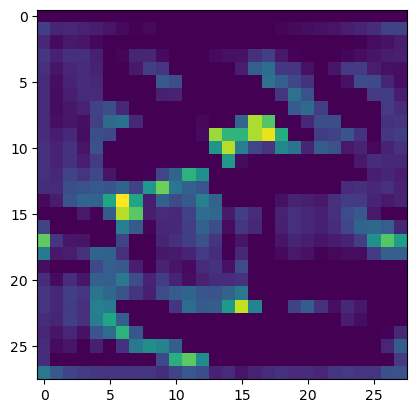

In [156]:
plt.imshow(predDeep.numpy()[0,:,:,1])

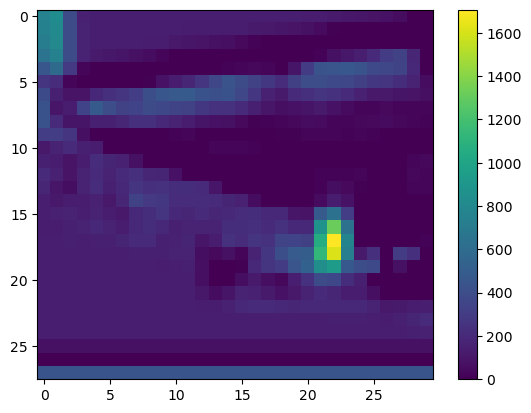

In [157]:
x_center, y_center = 99, 45  # example coordinates
patch_size = 50  # size of the square crop (e.g., 32x32)

# Calculate the cropping boundaries, making sure you don't go out of image bounds
x_start = max(x_center - patch_size // 2, 0)
x_end = min(x_center + patch_size // 2, img.shape[0])
y_start = max(y_center - patch_size // 2, 0)
y_end = min(y_center + patch_size // 2, img.shape[1])

# Crop the patch from the input image
patch = pred_np[x_center-15:x_center+15, y_center-15:y_center+15, 90]

# Display the patch
plt.imshow(patch, cmap='viridis')
plt.colorbar()
plt.show()



In [182]:
img1 = load_img("style.jpg" , target_size = (224,224))
img2 = load_img("content.jpg" , target_size = (224,224))
img1 = tf.expand_dims(img1,axis = 0)
img1 = tf.constant(img1)
styleImg = tf.keras.applications.vgg19.preprocess_input(img)
img2 = tf.expand_dims(img2,axis = 0)
img2 = tf.constant(img2)
contentImg = tf.keras.applications.vgg19.preprocess_input(img)

In [184]:
generatedImg = tf.constant(tf.zeros(styleImg.shape))

In [187]:
print(generatedImg.shape)
print(styleImg.shape)
print(contentImg.shape)    

(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [199]:
a_s = submodeldeep(styleImg)
a_g = submodeldeep(generatedImg)
a_s.shape

TensorShape([1, 28, 28, 512])

In [273]:
def grahm_matrices(a_s,a_g):
    i , j , k = a_s.shape[1] , a_s.shape[2] , a_s.shape[3]    
    grahm_matrix_as = np.zeros((k,k))
    grahm_matrix_ag = np.zeros((k,k))
    for channel in range(k):
        for channel2 in range(k):
            grahm_matrix_as[channel,channel2] =  np.sum(a_s[:,:,:,channel]*a_s[:,:,:,channel2])
            grahm_matrix_ag[channel,channel2] =  np.sum(a_g[:,:,:,channel]*a_g[:,:,:,channel2])
    grahm_matrix_as = tf.constant(grahm_matrix_as,dtype = tf.float32)    
    grahm_matrix_ag = tf.constant(grahm_matrix_ag,dtype = tf.float32)                                                                      
    return grahm_matrix_as , grahm_matrix_ag
grahm_matrix_as , grahm_matrix_ag = grahm_matrices(a_s,a_g)

In [261]:
def grahm_matrices_vectorized(a_a):
    b , i , j , k =  a_a.shape[0] , a_a.shape[1] , a_a.shape[2] , a_a.shape[3]    
    grahm_matrix = tf.zeros(k,k)
    X = tf.reshape(a_a , (b,i*j,k))
    grahm_matrix = np.dot(X[0,:,:].T,X[0,:,:])
    return grahm_matrix
grahm_matrix_as_vec  = grahm_matrices_vectorized(a_s)
grahm_matrix_ag_vec = grahm_matrices_vectorized(a_g)
print(grahm_matrix_as_vec)

[[4.0710788e+07 2.7445866e+07 1.0113382e+07 ... 5.3581815e+06
  8.5913169e+05 1.7462194e+05]
 [2.7445866e+07 9.5471834e+08 1.3491381e+08 ... 2.1895046e+07
  2.5024855e+06 1.6333220e+07]
 [1.0113382e+07 1.3491381e+08 4.1016726e+08 ... 8.5696688e+05
  2.4562375e+06 6.4451700e+06]
 ...
 [5.3581815e+06 2.1895046e+07 8.5696688e+05 ... 1.5404383e+07
  0.0000000e+00 1.9267867e+04]
 [8.5913169e+05 2.5024855e+06 2.4562375e+06 ... 0.0000000e+00
  1.6959318e+06 2.3077409e+05]
 [1.7462194e+05 1.6333220e+07 6.4451700e+06 ... 1.9267867e+04
  2.3077409e+05 1.6453154e+07]]


In [274]:
grahm_matrix_as.numpy()

array([[4.0710788e+07, 2.7445868e+07, 1.0113382e+07, ..., 5.3581815e+06,
        8.5913175e+05, 1.7462192e+05],
       [2.7445868e+07, 9.5471821e+08, 1.3491381e+08, ..., 2.1895044e+07,
        2.5024852e+06, 1.6333222e+07],
       [1.0113382e+07, 1.3491381e+08, 4.1016730e+08, ..., 8.5696688e+05,
        2.4562375e+06, 6.4451690e+06],
       ...,
       [5.3581815e+06, 2.1895044e+07, 8.5696688e+05, ..., 1.5404382e+07,
        0.0000000e+00, 1.9267867e+04],
       [8.5913175e+05, 2.5024852e+06, 2.4562375e+06, ..., 0.0000000e+00,
        1.6959316e+06, 2.3077409e+05],
       [1.7462192e+05, 1.6333222e+07, 6.4451690e+06, ..., 1.9267867e+04,
        2.3077409e+05, 1.6453153e+07]], dtype=float32)